In [1]:
import numpy as np 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

In [2]:
pr = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
sr = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1. Mean poverty rate of each state

In [3]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [4]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [3]:
pr['poverty_rate'].replace('-', 0, inplace = True)

In [4]:
pr['poverty_rate'].value_counts()

0       1464
0        201
6.7      129
7.4      129
10.9     128
        ... 
74.1       1
88         1
73.9       1
58.5       1
88.4       1
Name: poverty_rate, Length: 771, dtype: int64

In [5]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [6]:
pr['poverty_rate'] = pd.to_numeric(pr['poverty_rate'])

**Plot the Poverty rate of each state. (Demonstrate mean value of each Geogrophic Area (AL, AK, AR).)**

**Plot With Pandas Built in method:**

In [7]:
pr.groupby('Geographic Area')[['poverty_rate']].mean()

,poverty_rate
Geographic Area,
AK,18.678592
AL,20.611795
AR,22.963216
AZ,25.268071
CA,16.888371
CO,13.187773
CT,9.137500
DC,18.000000
DE,12.555844


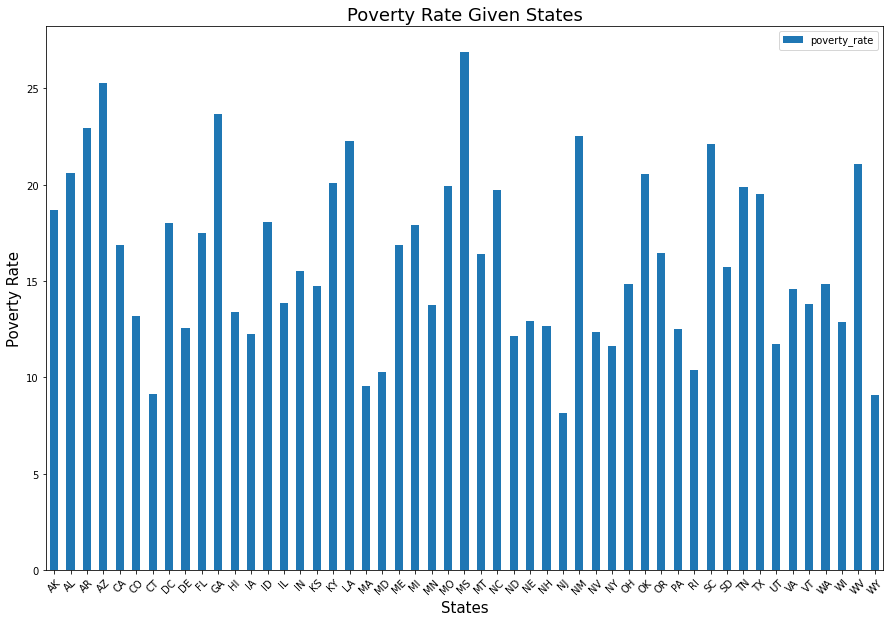

In [10]:
pr.groupby('Geographic Area')[['poverty_rate']].mean().plot.bar(figsize = (15, 10))
plt.xlabel('States', fontsize = 15)
plt.ylabel('Poverty Rate', fontsize = 15)
plt.title('Poverty Rate Given States', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

**Plot Sorted Values With Pandas Built in method:**

In [11]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42.0


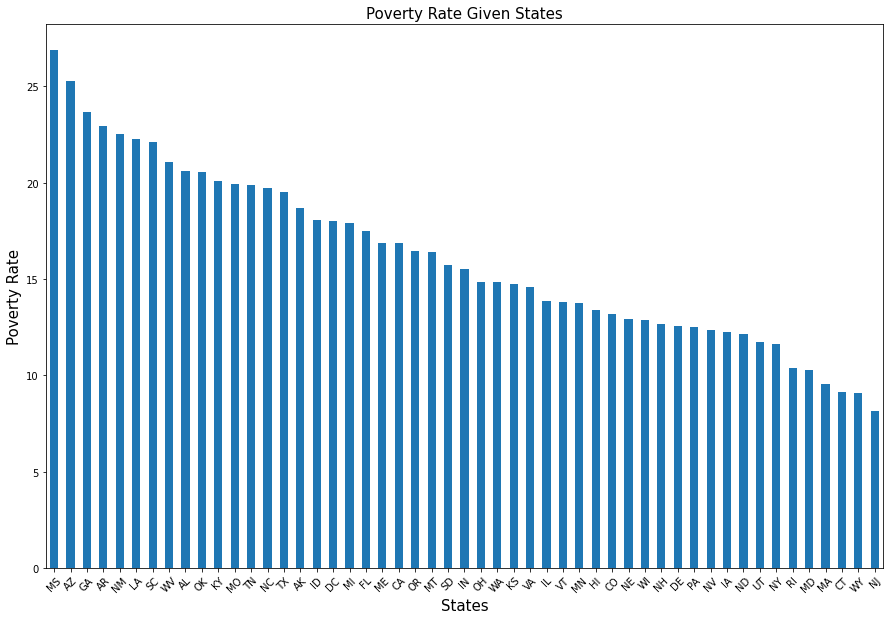

In [13]:
pr.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending = False).plot.bar(figsize = (15, 10))
plt.xlabel('States', fontsize = 15)
plt.ylabel('Poverty Rate', fontsize = 15)
plt.title('Poverty Rate Given States', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

**Plot Sorted Values With Matplotlib:** 

In [16]:
a = pr.groupby('Geographic Area')[['poverty_rate']].mean().sort_values(by = 'poverty_rate',\
                                          ascending = False)['poverty_rate'].values

In [14]:
b = pr.groupby('Geographic Area')[['poverty_rate']].mean().sort_values(by = 'poverty_rate', \
                                          ascending = False).index

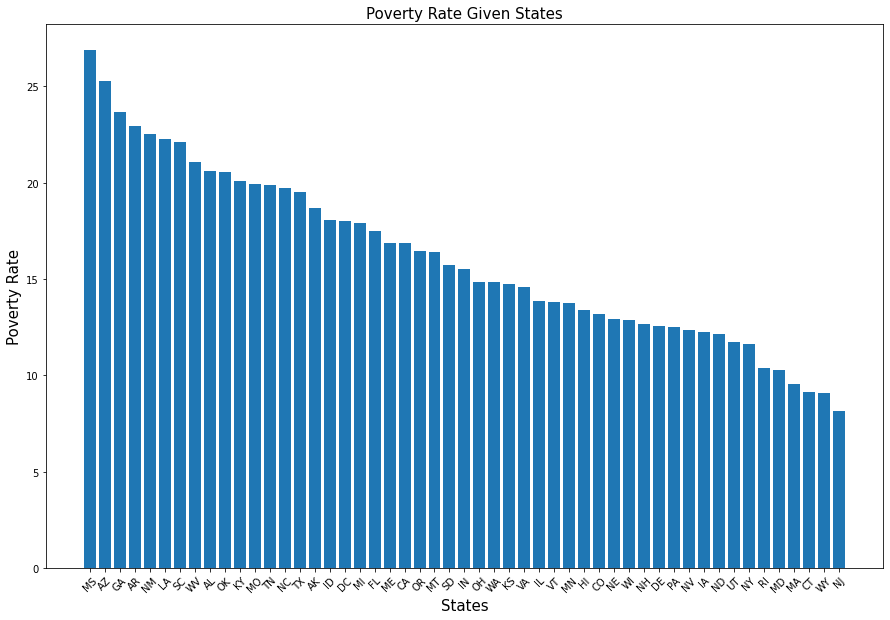

In [15]:
plt.figure(figsize = (15, 10))
plt.bar(b, a)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Poverty Rate', fontsize = 15)
plt.title('Poverty Rate Given States', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

**Plot Sorted Values With Seaborn** 

In [16]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [55]:
pr.groupby('Geographic Area')[['poverty_rate']].mean().sort_values('poverty_rate', ascending = False).index

Index(['MS', 'AZ', 'GA', 'AR', 'NM', 'LA', 'SC', 'WV', 'AL', 'OK', 'KY', 'MO',
       'TN', 'NC', 'TX', 'AK', 'ID', 'DC', 'MI', 'FL', 'ME', 'CA', 'OR', 'MT',
       'SD', 'IN', 'OH', 'WA', 'KS', 'VA', 'IL', 'VT', 'MN', 'HI', 'CO', 'NE',
       'WI', 'NH', 'DE', 'PA', 'NV', 'IA', 'ND', 'UT', 'NY', 'RI', 'MD', 'MA',
       'CT', 'WY', 'NJ'],
      dtype='object', name='Geographic Area')

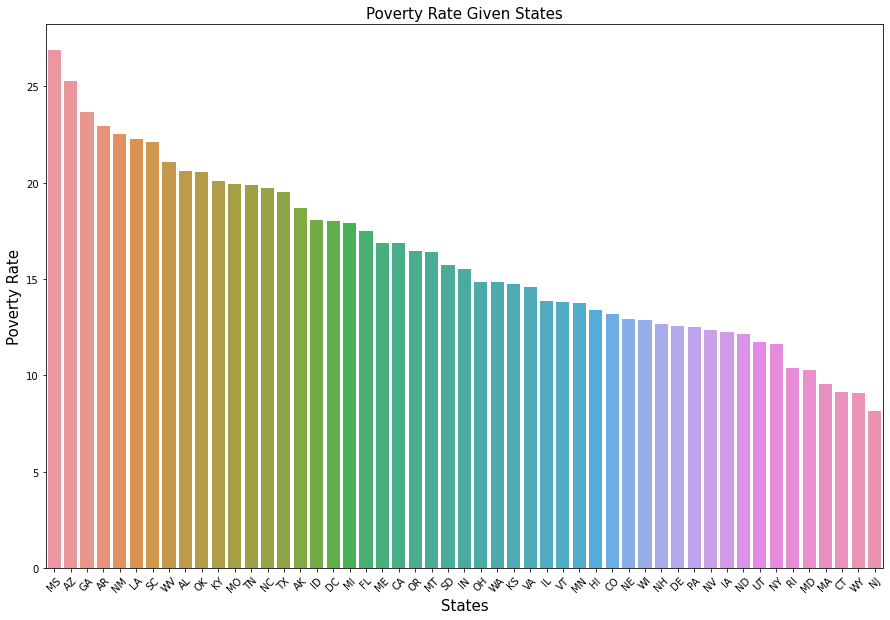

In [18]:
plt.figure(figsize = (15, 10))
sns.barplot(b, a)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Poverty Rate', fontsize = 15)
plt.title('Poverty Rate Given States', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

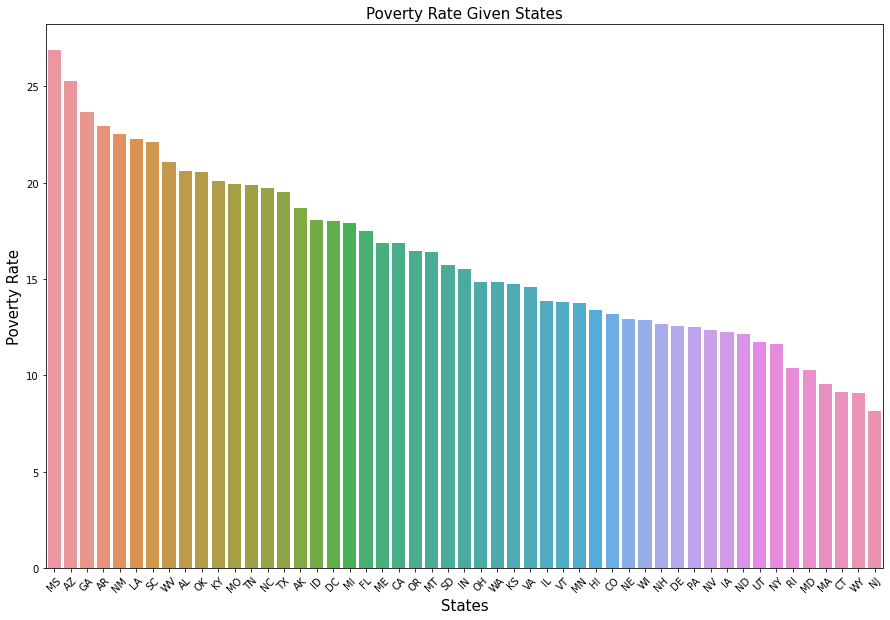

In [54]:
plt.figure(figsize = (15, 10))
sns.barplot(x = 'Geographic Area', y = 'poverty_rate', data = pr, ci = None, order = pr.groupby('Geographic Area')[['poverty_rate']].mean().sort_values('poverty_rate', ascending = False).index)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Poverty Rate', fontsize = 15)
plt.title('Poverty Rate Given States', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

## 2. Most common 15 Name or Surname of killed people 

In [20]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [21]:
kill.name.value_counts()

TK TK                  49
Michael Johnson         2
Brandon Jones           2
Eric Harris             2
Michael Brown           2
                       ..
Jack Yantis             1
Leslie Portis           1
Edson Thevenin          1
Johnny Ray Anderson     1
Anthony Ray Bauer       1
Name: name, Length: 2481, dtype: int64

In [8]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

**Plot Most common 15 Name or Surname of killed people** 

In [9]:
pairs = pairs.apply(','.join)

In [10]:
pairs = pd.DataFrame(pairs)

In [11]:
pairs2 = pairs['name'].str.get_dummies(',')

In [12]:
pairs2.head(2)

,"""Beanie""","""Butch""","""Clint""","""Ebbie""","""Geno""","""JC""","""LaVoy""","""Phil""","""Zeus""",A'Donte,...,Zennie,Zhonghua,Ziegler,Zimbelman,Zimmerman,Zollo,Zumwalt,de,del,la
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
pairs2.shape

(2486, 2757)

In [14]:
pairs2.sum(axis = 0).sort_values(ascending = False).head(15)

Michael        91
James          57
David          57
Robert         48
Joseph         48
William        47
Daniel         46
John           42
Christopher    40
Lee            38
Richard        36
Smith          36
Johnson        32
Anthony        32
J.             32
dtype: int64

In [15]:
a = pairs2.sum(axis = 0).sort_values(ascending = False).head(15).index

In [16]:
b = pairs2.sum(axis = 0).sort_values(ascending = False).head(15).values

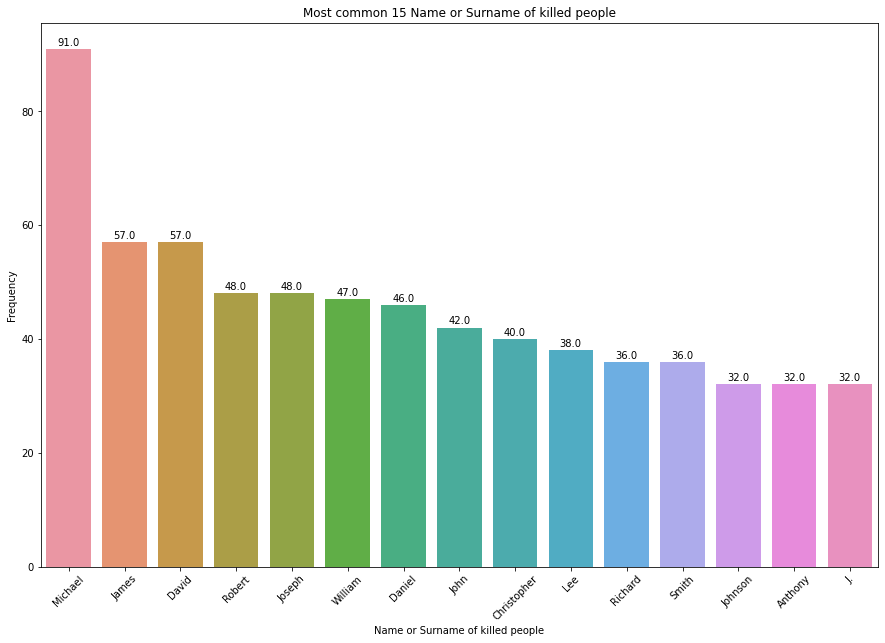

In [17]:
plt.figure(figsize = (15, 10))
g = sns.barplot(a, b)
plt.title('Most common 15 Name or Surname of killed people')
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.6))
plt.show()

In [69]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [70]:
df = pd.DataFrame(pairs)

In [71]:
df.head(2)

,name
0,"[Tim, Elliot]"
1,"[Lewis, Lee, Lembke]"


In [72]:
df['len'] = df['name'].apply(len)

In [73]:
df.head(2)

,name,len
0,"[Tim, Elliot]",2
1,"[Lewis, Lee, Lembke]",3


In [74]:
df['len'].value_counts()

2    1602
3     836
4      48
Name: len, dtype: int64

In [75]:
two_names = df.name[df.len == 2]

In [76]:
two_names.head(2)

0         [Tim, Elliot]
3    [Matthew, Hoffman]
Name: name, dtype: object

In [77]:
three_names = df.name[df.len == 3]

In [78]:
four_names = df.name[df.len == 4]

In [79]:
a, b = zip(*two_names)

In [80]:
a[:5]

('Tim', 'Matthew', 'Michael', 'Brock', 'Autumn')

In [81]:
b[:5]

('Elliot', 'Hoffman', 'Rodriguez', 'Nichols', 'Steele')

In [82]:
c, d, e = zip(*three_names)

In [83]:
f, g, h, j = zip(*four_names)

In [84]:
total_list = a+b+c+d+e+f+g+h+j

In [85]:
len(total_list)

5904

In [86]:
Counter(total_list)

Counter({'Tim': 3,
         'Matthew': 24,
         'Michael': 91,
         'Brock': 2,
         'Autumn': 1,
         'Patrick': 15,
         'Ron': 2,
         'Loren': 3,
         'Thomas': 27,
         'Jimmy': 5,
         'Andy': 1,
         'Tommy': 3,
         'Brian': 12,
         'Salvador': 4,
         'Richard': 36,
         'Marcus': 5,
         'Mario': 8,
         'Talbot': 1,
         'Robert': 48,
         'Donte': 3,
         'Jose': 28,
         'Nathan': 6,
         'Scott': 27,
         'Zaki': 1,
         'Terence': 3,
         'Pablo': 4,
         'Daniel': 46,
         'Jonathan': 13,
         'Carter': 5,
         'Paul': 19,
         'Dewayne': 3,
         'Isaac': 2,
         'Andrew': 20,
         'Tiano': 1,
         'Kristiana': 1,
         'Demaris': 1,
         'Wendell': 1,
         'Daryl': 1,
         'Darin': 1,
         'William': 47,
         'Jessie': 3,
         'Raymond': 11,
         'David': 57,
         'Chris': 3,
         'Jermonte': 1,
    

In [87]:
name_count = Counter(total_list)

In [88]:
most_common_names = name_count.most_common(15)

In [89]:
most_common_names

[('Michael', 91),
 ('David', 57),
 ('James', 57),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 38),
 ('Richard', 36),
 ('Smith', 36),
 ('Anthony', 32),
 ('Johnson', 32),
 ('J.', 32)]

In [90]:
x, y = zip(*most_common_names)

In [93]:
x, y = list(x), list(y)

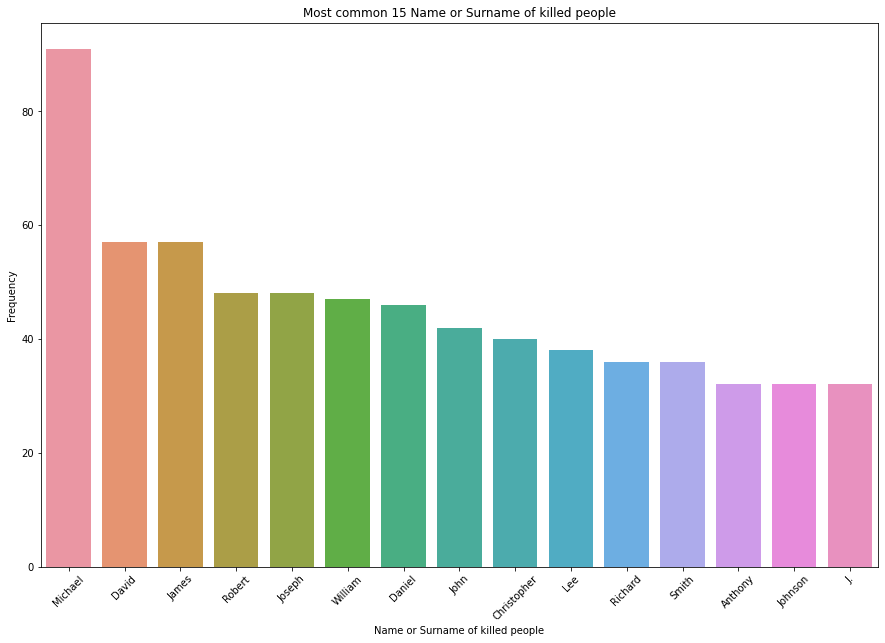

In [94]:
plt.figure(figsize = (15, 10))
sns.barplot(x, y)
plt.title('Most common 15 Name or Surname of killed people')
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()

## 3. Killed People According to Races (Pie Chart)

In [29]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [30]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [31]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [32]:
sr.head(2)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1


In [33]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [34]:
kill.dropna(subset = ['race'], inplace = True)

In [35]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2340 non-null   int64  
 1   name                     2340 non-null   object 
 2   date                     2340 non-null   object 
 3   manner_of_death          2340 non-null   object 
 4   armed                    2334 non-null   object 
 5   age                      2311 non-null   float64
 6   gender                   2340 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2340 non-null   object 
 9   state                    2340 non-null   object 
 10  signs_of_mental_illness  2340 non-null   bool   
 11  threat_level             2340 non-null   object 
 12  flee                     2288 non-null   object 
 13  body_camera              2340 non-null   bool   
dtypes: bool(2), float64(1), 

**Demonstrate Race Ratio of Killed People by a Pie Chart**

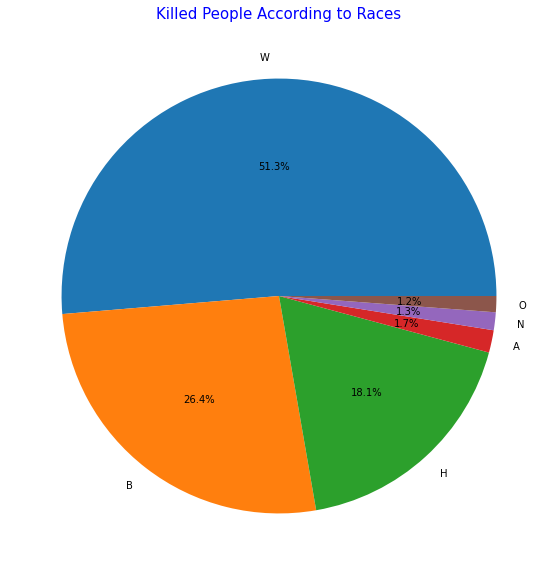

In [36]:
plt.figure(figsize = (15, 10))
plt.pie(kill['race'].value_counts(),labels = kill['race'].value_counts().index, autopct='%1.1f%%')
plt.title('Killed People According to Races', fontsize = 15, color = 'blue')
plt.show()

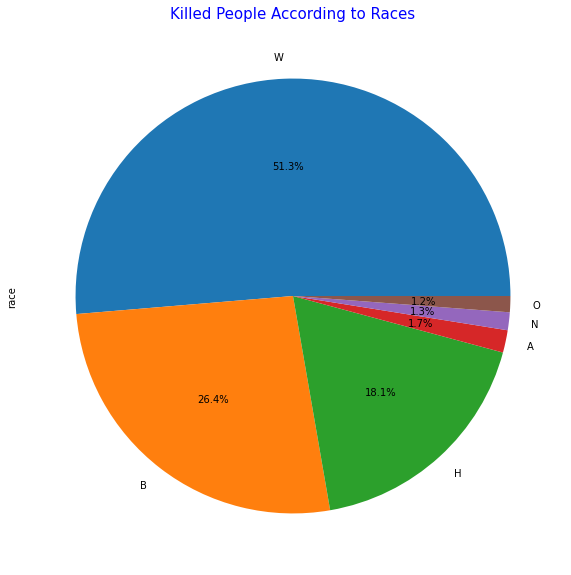

In [38]:
plt.figure(figsize = (15, 10))
kill['race'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Killed People According to Races', fontsize = 15, color = 'blue')
plt.show()

## 4a.Box plot of age in both genders separeted by manner of death.

In [37]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [38]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

<AxesSubplot:>

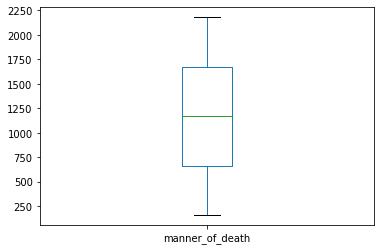

In [39]:
kill['manner_of_death'].value_counts(dropna = False).plot.box()

<AxesSubplot:xlabel='manner_of_death'>

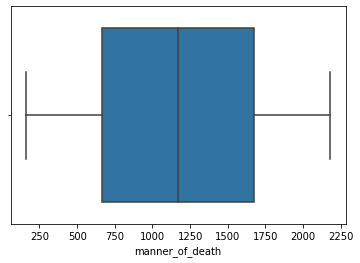

In [40]:
sns.boxplot(kill['manner_of_death'].value_counts(dropna = False))

In [41]:
kill.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False


<AxesSubplot:xlabel='gender', ylabel='age'>

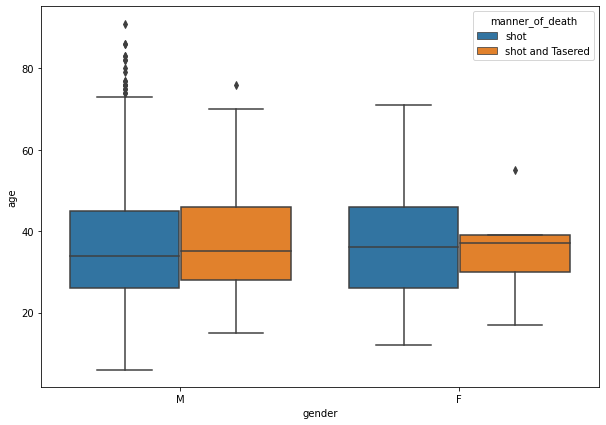

In [95]:
plt.figure(figsize = (10, 7))
sns.boxplot('gender', 'age', 'manner_of_death', kill)

<AxesSubplot:xlabel='gender', ylabel='age'>

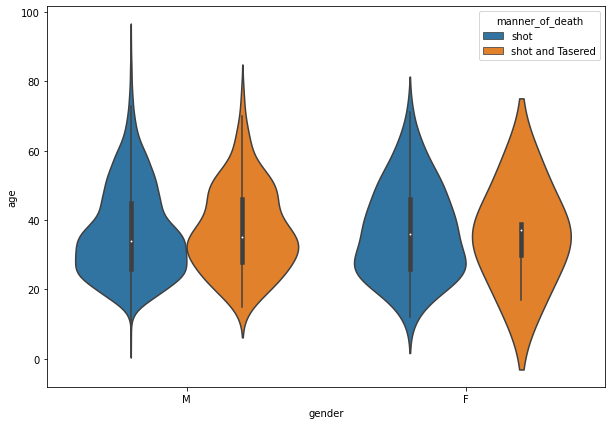

In [98]:
plt.figure(figsize = (10, 7))
sns.violinplot('gender', 'age', 'manner_of_death', kill)

<AxesSubplot:xlabel='gender', ylabel='age'>

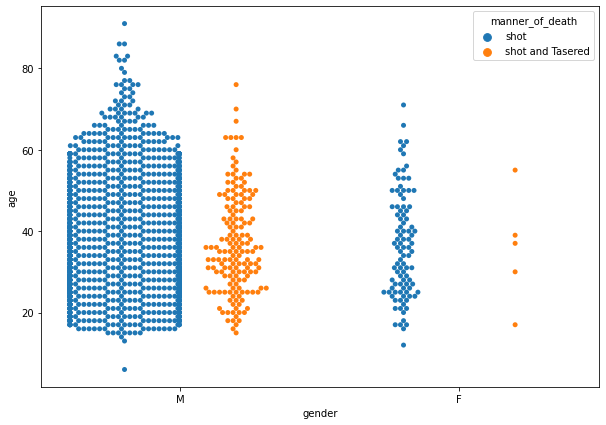

In [97]:
plt.figure(figsize = (10, 7))
sns.swarmplot('gender', 'age', 'manner_of_death', kill, dodge = True)

## 4b. Swarm Plot

**Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

<AxesSubplot:xlabel='gender', ylabel='age'>

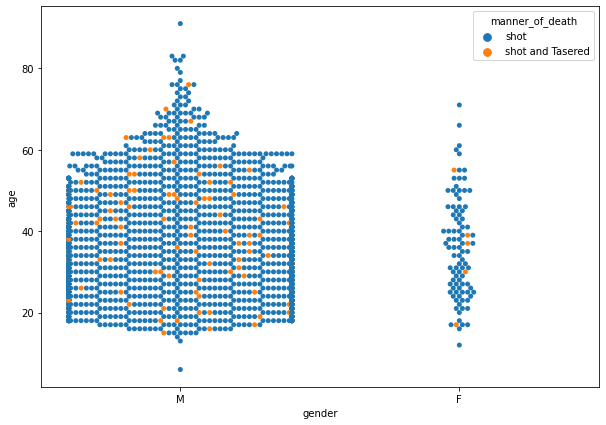

In [98]:
plt.figure(figsize = (10, 7))
sns.swarmplot('gender', 'age', 'manner_of_death', kill)

## 5. Kill properties (Count Plots)

**Plot number of poeple by gender**

<AxesSubplot:xlabel='gender', ylabel='count'>

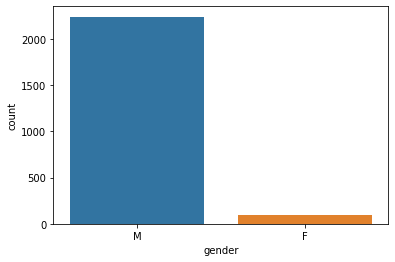

In [49]:
sns.countplot('gender', data = kill)

**Plot 7 most common kill weapons**

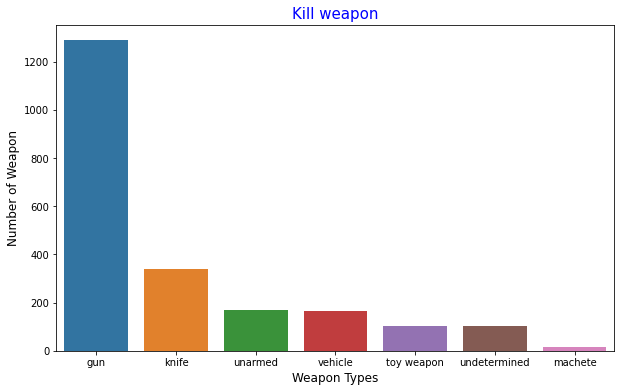

In [113]:
plt.figure(figsize = (10, 6))
sns.countplot('armed', data = kill, order = kill['armed'].value_counts().iloc[:7].index)
plt.title('Kill weapon', fontsize = 15, color = 'blue')
plt.xlabel('Weapon Types', fontsize = 12)
plt.ylabel('Number of Weapon', fontsize = 12)
plt.show()

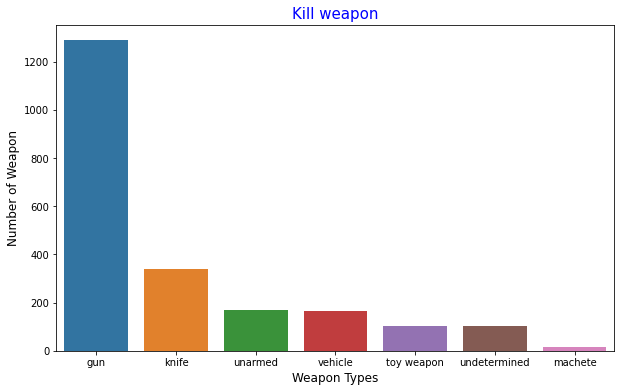

In [112]:
plt.figure(figsize = (10, 6))
sns.countplot('armed', data = kill, order = kill['armed'].value_counts().index[0:7])
plt.title('Kill weapon', fontsize = 15, color = 'blue')
plt.xlabel('Weapon Types', fontsize = 12)
plt.ylabel('Number of Weapon', fontsize = 12)
plt.show()

**Plot number of age of killed people under two groups : Under 25 and Above 25**

In [58]:
kill.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False


In [99]:
kill['age_cat'] = kill['age'].apply(lambda x : 'Above 25' if x >= 25 else 'Under 25')

<AxesSubplot:xlabel='age_cat', ylabel='count'>

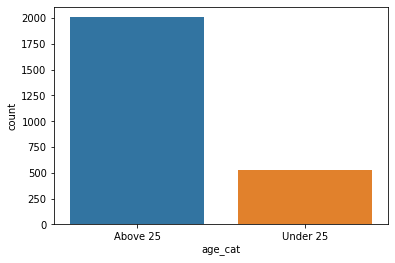

In [100]:
sns.countplot('age_cat', data = kill)

In [70]:
kill[kill['age'] < 25].count()['id']

433

In [71]:
kill[kill['age'] > 25].count()['id']

1779

In [72]:
kill[kill['age'] == 25].count()['id']

99

<AxesSubplot:xlabel='signs_of_mental_illness', ylabel='count'>

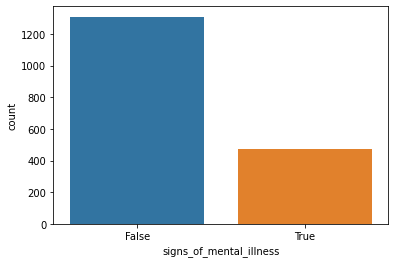

In [63]:
sns.countplot('signs_of_mental_illness', data = kill[kill['age'] < 25])
sns.countplot('signs_of_mental_illness', data = kill[kill['age'] > 25])

In [60]:
kill.groupby('age')['id'].count()

age
6.0     1
12.0    1
13.0    1
14.0    1
15.0    7
       ..
79.0    1
80.0    1
82.0    2
83.0    2
91.0    1
Name: id, Length: 72, dtype: int64

**INSTRUCTION-4: Plot number of killed poeple by race**

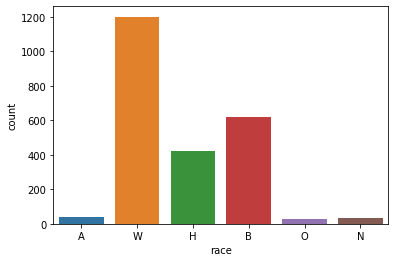

In [71]:
sns.countplot('race', data = kill)
plt.show()

**Plot 12 most dangerous cities**

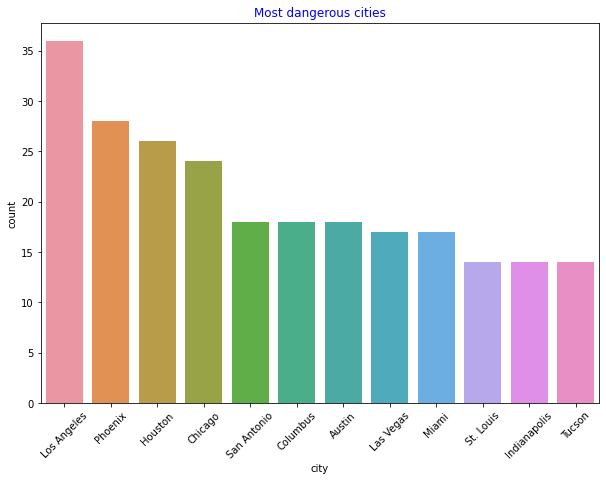

In [80]:
plt.figure(figsize = (10, 7))
sns.countplot('city', data = kill, order = kill['city'].value_counts().iloc[:12].index)
plt.title('Most dangerous cities', fontsize = 12, color = 'blue')
plt.xticks(rotation = 45)
plt.show()

**Plot 20 most dangerous states**

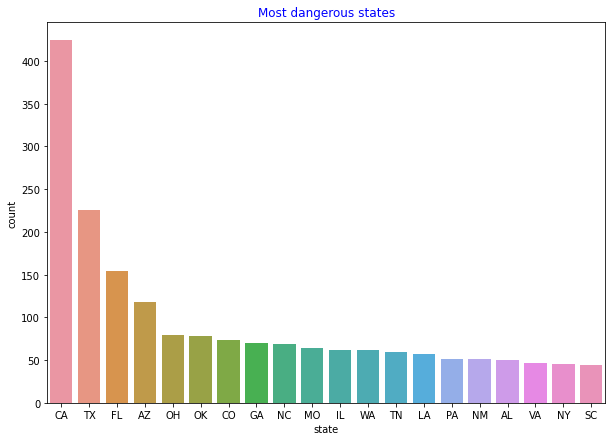

In [101]:
plt.figure(figsize = (10, 7))
sns.countplot('state', data = kill, order = kill['state'].value_counts().iloc[:20].index)
plt.title('Most dangerous states', fontsize = 12, color = 'blue')
plt.show()

**Plot Having mental ilness or not for killed people**

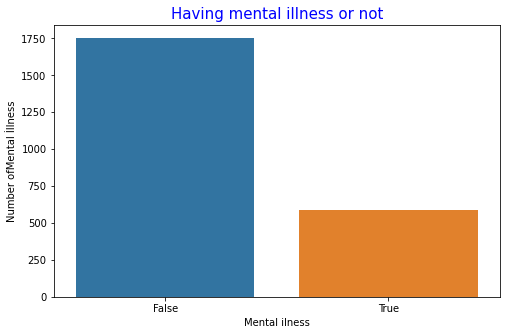

In [93]:
plt.figure(figsize = (8, 5))
sns.countplot('signs_of_mental_illness', data = kill)
plt.xlabel('Mental ilness')
plt.ylabel('Number ofMental İllness')
plt.title('Having mental illness or not', fontsize = 15, color = 'blue')
plt.show()

**Plot number of Threat Types**

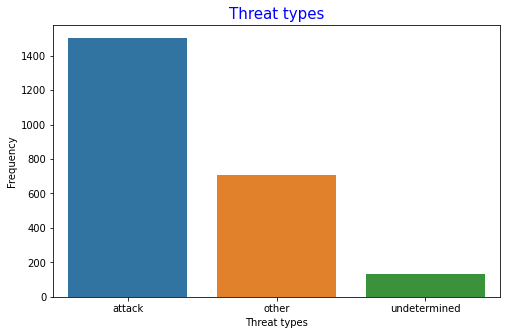

In [92]:
plt.figure(figsize = (8, 5))
sns.countplot('threat_level', data = kill)
plt.xlabel('Threat types')
plt.ylabel('Frequency')
plt.title('Threat types', fontsize = 15, color = 'blue')
plt.show()

**Plot number of Flee Types**

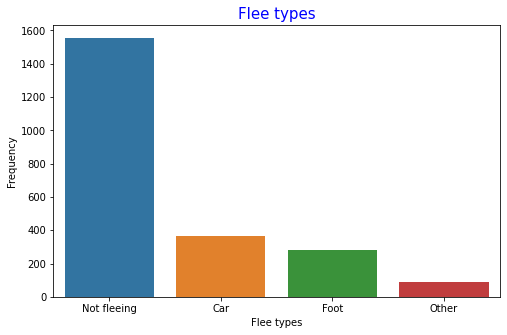

In [95]:
plt.figure(figsize = (8, 5))
sns.countplot('flee', data = kill)
plt.xlabel('Flee types')
plt.ylabel('Frequency')
plt.title('Flee types', fontsize = 15, color = 'blue')
plt.show()